In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
df = pd.read_csv('/content/Diwali Sales Data.csv' , encoding= 'unicode_escape')
#to avoid encoding error, use 'unicode_escape'

In [59]:
df.shape

(11251, 15)

In [60]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [62]:
#check for null values
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [63]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [64]:
df.dropna(inplace=True)

In [65]:
#change data type
df = df.fillna(0)
df['Amount'] = df['Amount'].astype('int')

In [66]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [67]:
#rename column
df.rename(columns={'Cust_name':'Customer_name'},inplace=(True))

In [68]:
df[['Age','Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## **EXPLORTORY DATA ANALYSIS**

**GENDER**

In [69]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

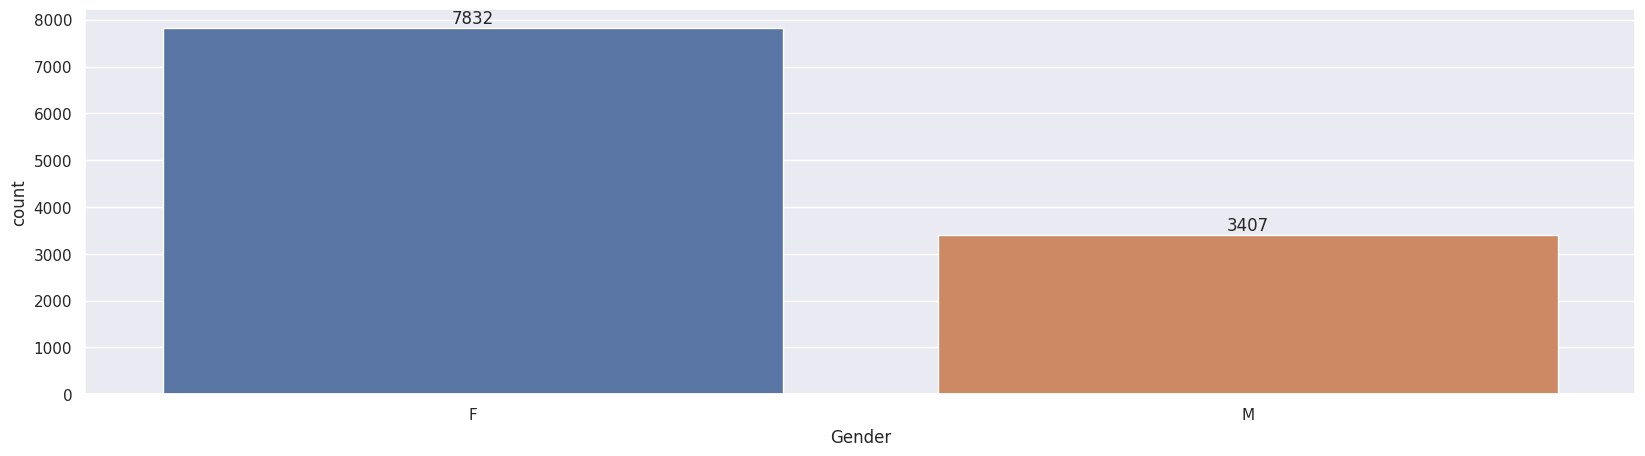

In [70]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

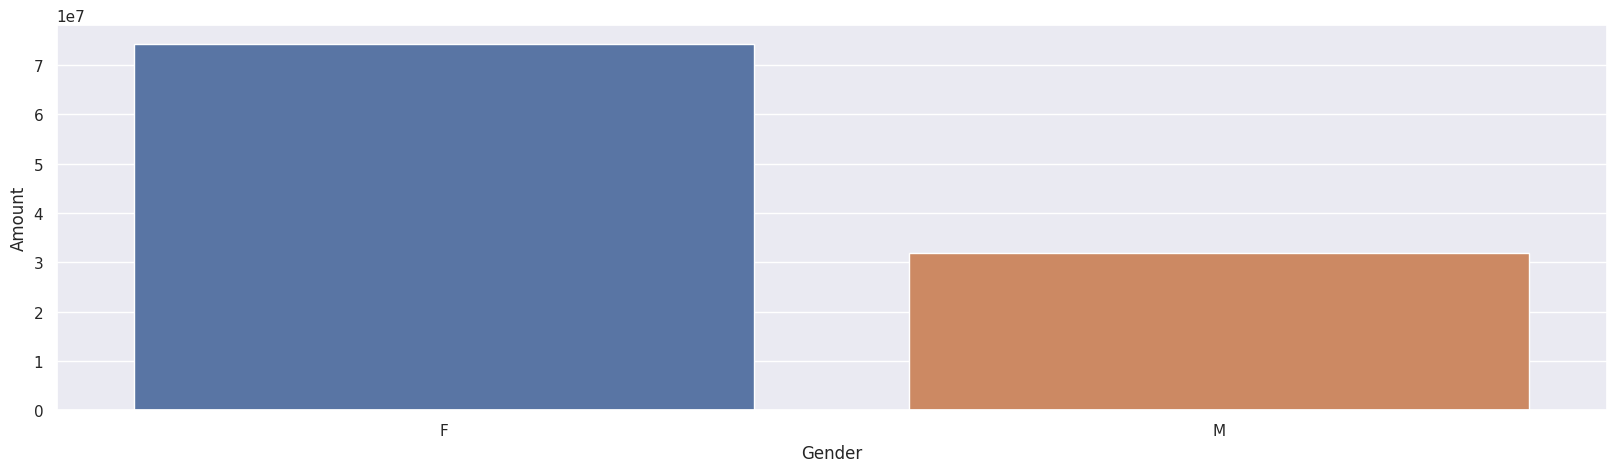

In [71]:
sales_gen = df.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Gender', y='Amount', data= sales_gen)

***From above graphs we can see that most of the buyers are females and even the purchaising power of females are greater than men.***


## **AGE**

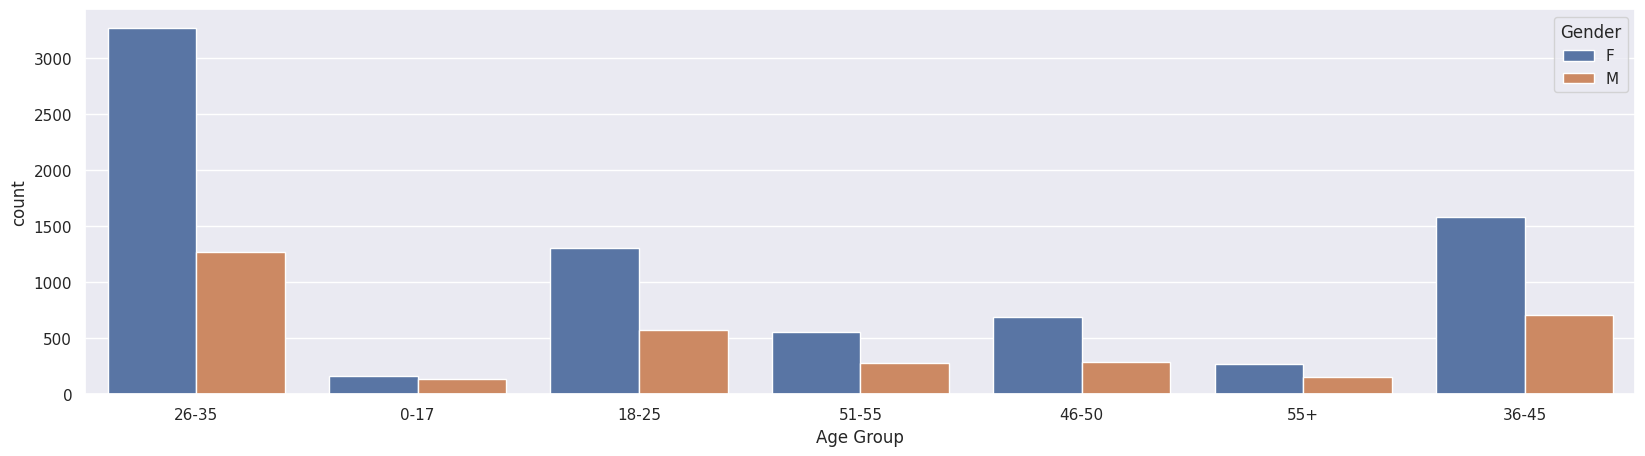

In [72]:
ax = sns.countplot(data= df, x = 'Age Group', hue= 'Gender')

for bars in ax.containers: ax.bar_label

<Axes: xlabel='Age Group', ylabel='Amount'>

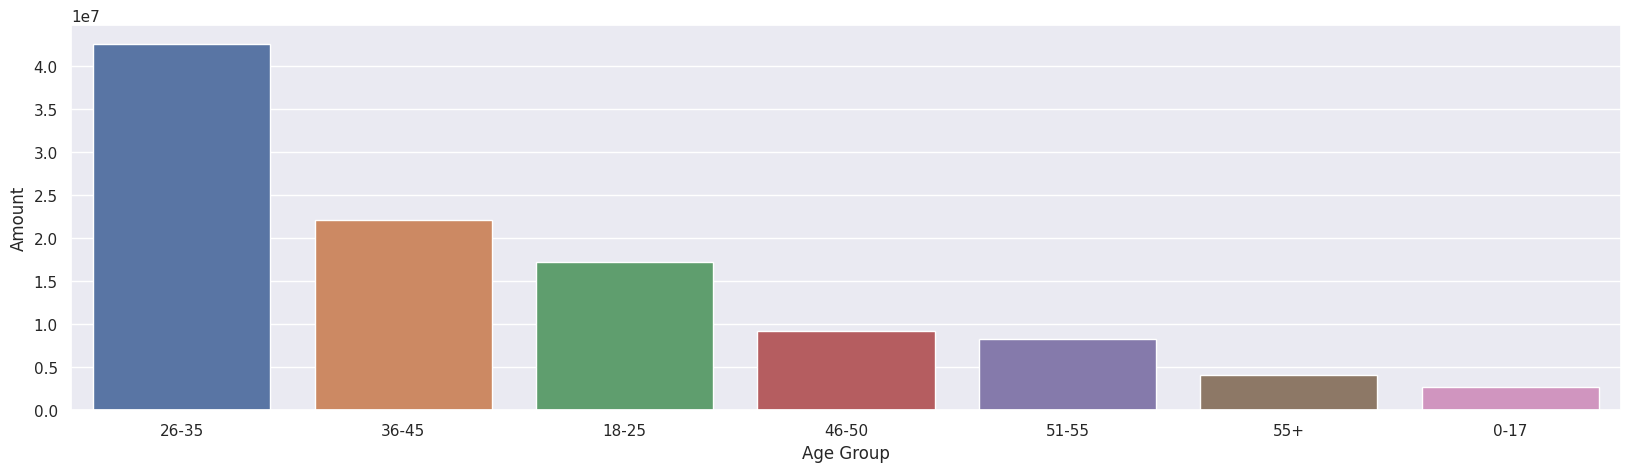

In [73]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index= False) ['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Age Group', y='Amount', data = sales_age)

***From above graphs we can see that most of the buyers are age of group between 26-35 yrs female.***

## **STATE**

In [74]:
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

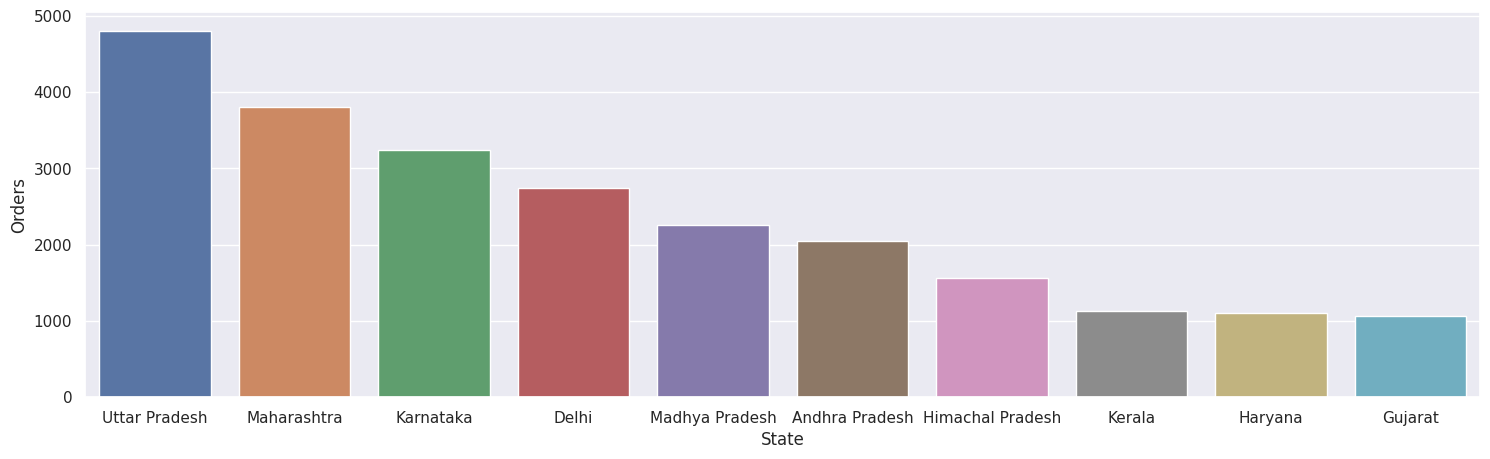

In [75]:
# total numbers of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by ='Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(x='State', y='Orders', data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

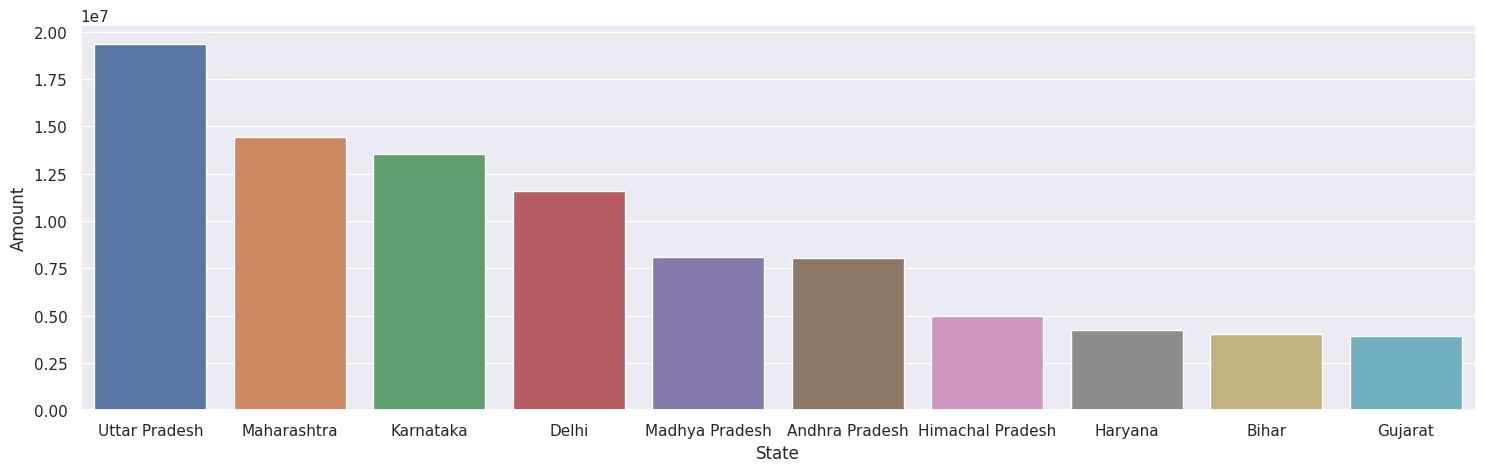

In [76]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending = False).head(10)


sns.barplot(x='State', y='Amount', data=sales_state)

***From above graphs we can see that most of the orders and sales/amounts are from Uttar Pradesh, Maharashtra and Karnataka respectively.***

# **MARITAL STATUS**

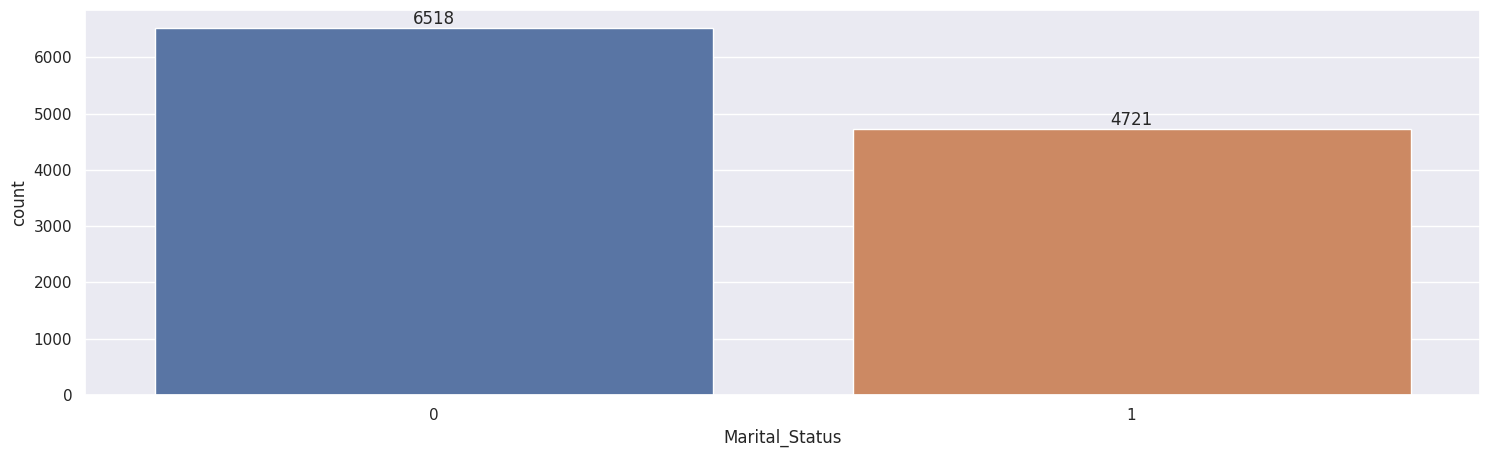

In [77]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize': (8,5)})
for bars in ax.containers: ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

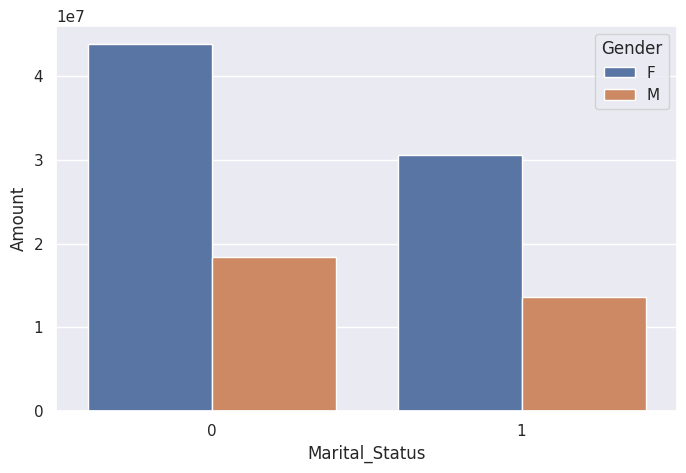

In [78]:
sales_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending = False)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='Marital_Status', y='Amount', data=sales_marital_status, hue='Gender')

**From above graphs we can see that most of the buyers are married(women) and they have high purchasing power**

# **OCCUPATION**

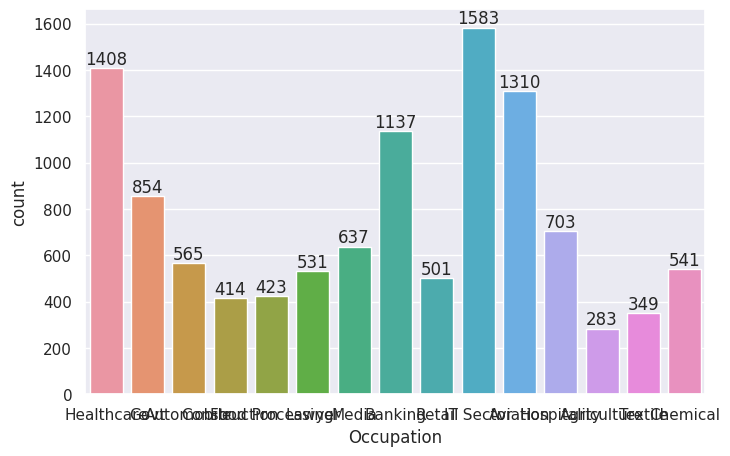

In [79]:
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers: ax.bar_label(bars)
sns.set(rc={'figure.figsize':(20,5)})

<Axes: xlabel='Occupation', ylabel='Amount'>

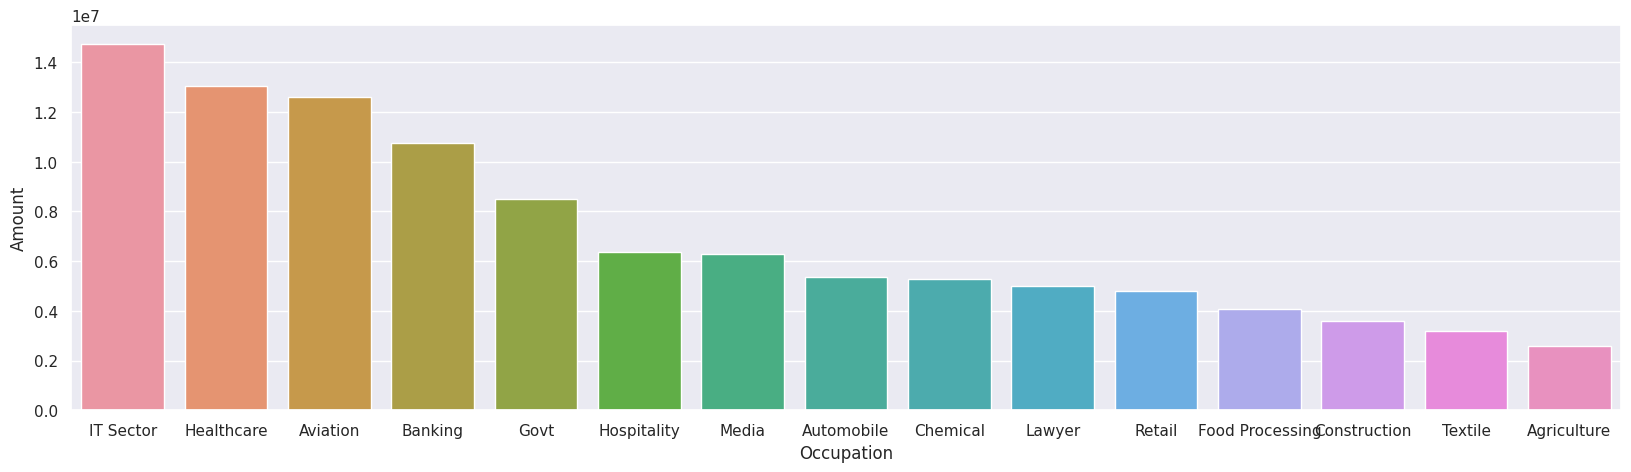

In [80]:
sales_occupation = df.groupby(['Occupation'], as_index = False) ['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_occupation,x='Occupation', y='Amount')

 **From above graph we can see that most of the buyers are working in IT, Healthcare and Aviation sector.**


# **PRODUCT CATEGORY**

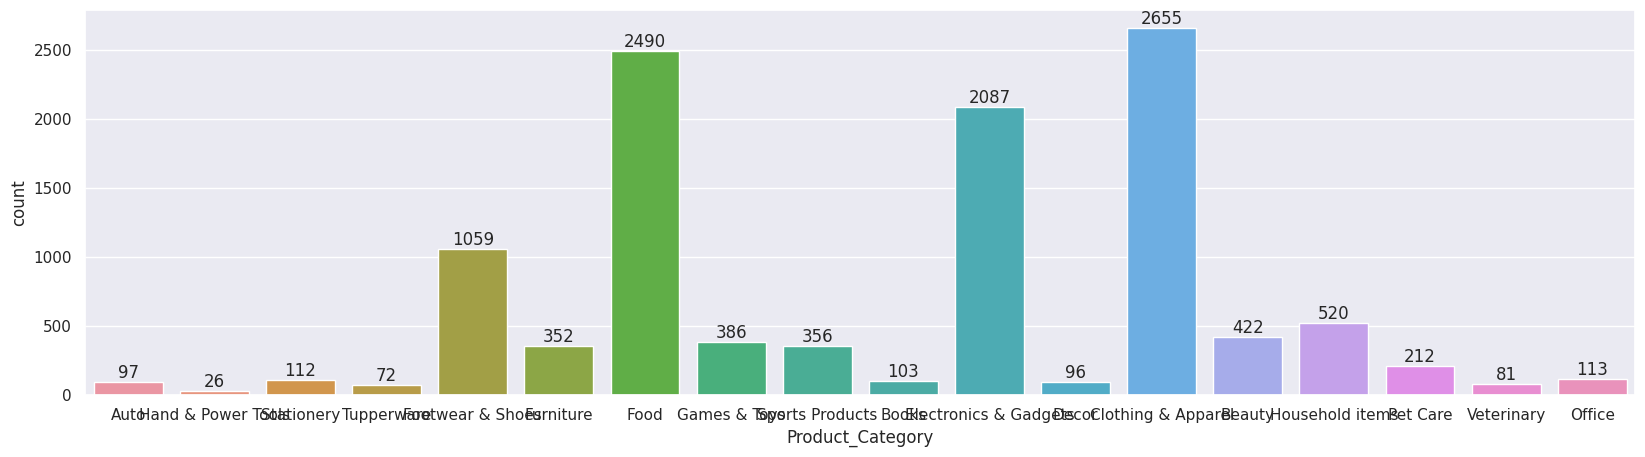

In [81]:
ax = sns.countplot(data= df, x ='Product_Category')

for bars in ax.containers: ax.bar_label(bars)
sns.set(rc={'figure.figsize': (35,5)})

<Axes: xlabel='Product_Category', ylabel='Amount'>

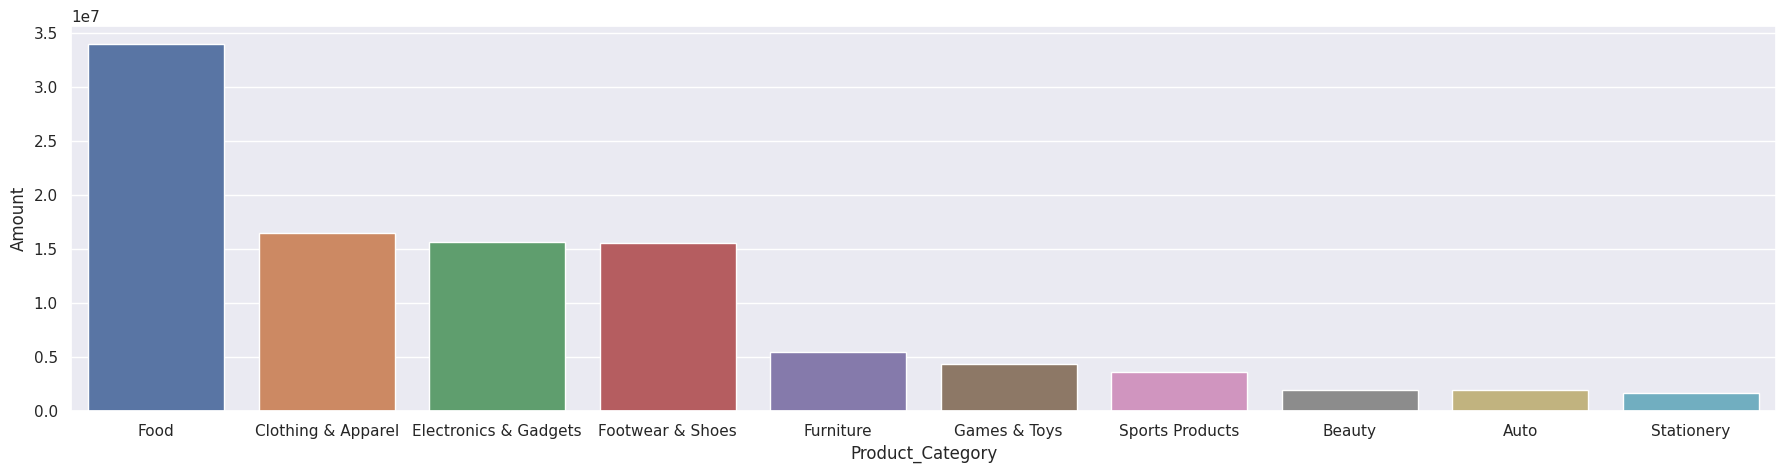

In [82]:
sales_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize': (22,5)})
sns.barplot(data = sales_product_category, x = 'Product_Category', y= 'Amount')

 **From above graphs we can see that the most of the sold product are from Food, Clothing, Electronic and Footwear category.**

# **PRODUCT_ID**


<Axes: xlabel='Product_ID', ylabel='Orders'>

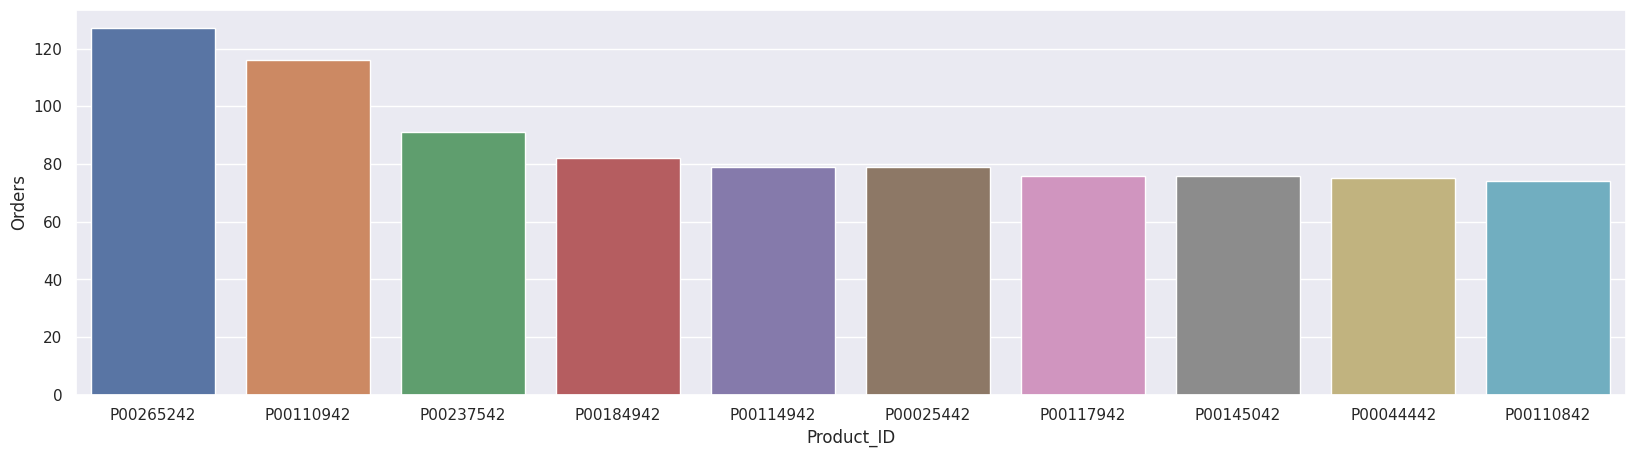

In [83]:
sales_product_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_product_id, x= 'Product_ID', y ='Orders')

# **CONCLUSION:**

**Married women age group 26-35 yrs from UP, Maharastra and Karnataka workin in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronic category.**